In [2]:
import sys
print('Python: {}'.format(sys.version))
import numpy
print('numpy: {}'.format(numpy.__version__))
import scipy
print('scipy: {}'.format(scipy.__version__))
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
import pandas
print('pandas: {}'.format(pandas.__version__))
import sklearn
print('sklearn:{}'.format(sklearn.__version__))

Python: 3.6.1 (default, May  2 2017, 15:16:41) 
[GCC 6.3.0]
numpy: 1.13.1
scipy: 0.19.1
matplotlib: 2.0.2
pandas: 0.20.3
sklearn:0.19.0


In [7]:
# dataframe
import numpy
import pandas
myarray = numpy.array([[1, 2, 3],[4, 5, 6]])
rownames = ['a', 'b']
colnames = ['one', 'two', 'three']
mydataframe = pandas.DataFrame(myarray, index=rownames, columns = colnames)
print(mydataframe)

   one  two  three
a    1    2      3
b    4    5      6


In [14]:
# load CSV from URL using Pandas
import pandas
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres','skin','test','mass', 'pedi', 'age', 'class']
# names = expects a list of column header names 
data = pandas.read_csv(url, names=names)
print(data.shape)

(768, 9)


In [15]:
# Statistical Summary
# head() function: examine the first few rows of data
# shape property: review the dimensions of the data
# dtypes property: look at the data types
# describe() function: review the data distribution
# corr() function: calculate pairwise correlation
import pandas
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres','skin','test','mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
description = data.describe()
print(description)

             preg        plas        pres        skin        test        mass  \
count  768.000000  768.000000  768.000000  768.000000  768.000000  768.000000   
mean     3.845052  120.894531   69.105469   20.536458   79.799479   31.992578   
std      3.369578   31.972618   19.355807   15.952218  115.244002    7.884160   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      1.000000   99.000000   62.000000    0.000000    0.000000   27.300000   
50%      3.000000  117.000000   72.000000   23.000000   30.500000   32.000000   
75%      6.000000  140.250000   80.000000   32.000000  127.250000   36.600000   
max     17.000000  199.000000  122.000000   99.000000  846.000000   67.100000   

             pedi         age       class  
count  768.000000  768.000000  768.000000  
mean     0.471876   33.240885    0.348958  
std      0.331329   11.760232    0.476951  
min      0.078000   21.000000    0.000000  
25%      0.243750   24.000000    0.000000  
50%   

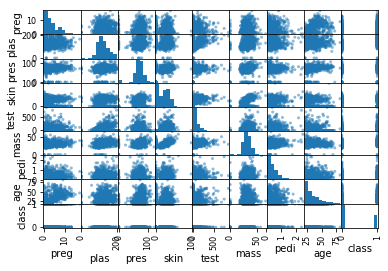

In [25]:
# Scatter Plot Matrix
# hist() function: create a histogram of each attribute
# plot(kind=box) function: create box-and-whisper plot of each attribute
# pandas.scatter_matrix() function: create pairwise scatterplots 
import matplotlib.pyplot as plt
import pandas
from pandas.plotting import scatter_matrix
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pandas.read_csv(url, names=names)
scatter_matrix(data)
plt.show()

In [7]:
# Prepare for modeling by pre-processing data
# scikit-learn provides two idioms for transforming data
# Fit and Multiple Transfor and Combined Fit-And-Transform
# data prep: standardize numerical data (e.g. mean of 0 and stand dev of 1)
# data prep: normalize numerical data (e.g. to a range of 0-1)
# ex: loads data, calculates parameters to standardize, 
# and creates standarized copy of the input data

from sklearn.preprocessing import StandardScaler
import pandas
import numpy
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values

# seperate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

# summarize transformed data
numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

[[ 0.64   0.848  0.15   0.907 -0.693  0.204  0.468  1.426]
 [-0.845 -1.123 -0.161  0.531 -0.693 -0.684 -0.365 -0.191]
 [ 1.234  1.944 -0.264 -1.288 -0.693 -1.103  0.604 -0.106]
 [-0.845 -0.998 -0.161  0.155  0.123 -0.494 -0.921 -1.042]
 [-1.142  0.504 -1.505  0.907  0.766  1.41   5.485 -0.02 ]]


In [1]:
# Algorithmim Evaluation with Resampling Methods
# training data: the dataset used to train a ML algorithm
# resampling can be used to split a training dataset into subsets, some 
# are used to train the model and some used to estimate model accuracy.
# 
# Below: estimate the accuracy of Logistical Regression using 10-fold
# cross validataion.

# Evaluate using Cross Validataion
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
results = cross_val_score(model, X, Y, cv=kfold)
# print("Accuracy: %.3f%% (%.3f%%)") % (results.mean()*100.0, results.std()*100.0)


In [17]:
# Cross Validation Classification LogLoss
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
kfold = KFold(n_splits=10, random_state=7)
model = LogisticRegression()
scoring = 'neg_log_loss'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print("Logloss: %.3f %.3f" % (results.mean(), results.std()))

Logloss: -0.493 0.047


In [20]:
# KNN Regression
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
url = "https://goo.gl/sXleFv"
names = ['CRIM','ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
dataframe = read_csv(url, delim_whitespace=True, names=names)
array = dataframe.values
X = array[:,0:13]
Y = array[:,13]
kfold = KFold(n_splits=10, random_state=7)
model = KNeighborsRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
print(results.mean())

NameError: name 'KNeighborsRegressor' is not defined

In [21]:
# Compare Algorithms
# Compare the estimated performance of different algorithms
# and select the best model
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# load dataset
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)


In [23]:
# Grid Search for Algorithm Tuning
# Tune the parameters using a grid search / random search
from pandas import read_csv
import numpy
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
alphas = numpy.array([1,0.1,0.01,0.001,0.0001,0])
param_grid = dict(alpha=alphas)
model = Ridge()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)
print(grid.best_score_)
print(grid.best_estimator_.alpha)

0.279617559313
1.0


In [24]:
# Random Forest Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, random_state=7)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, X, Y, cv=kfold)
print(results.mean())

0.76038961039


In [25]:
# Save Model Using Pickle
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import pickle
url = "https://goo.gl/vhm1eU"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
# Fit the model on 33%
model = LogisticRegression()
model.fit(X_train, Y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, Y_test)
print(result)

0.755905511811
